In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = tf.keras.utils.image_dataset_from_directory("data")
data = data.map(lambda x, y: (x / 255, y))
train_size = int(len(data) * 0.70)
val_size = int(len(data) * 0.20)
test_size = int(len(data) * 0.10)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

Found 3292 files belonging to 2 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU


model = Sequential()


model.add(Dense(16, input_shape=(256,256,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(32))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.1))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256, 256, 16)      64        
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256, 256, 16)      0         
                                                                 
 dense_1 (Dense)             (None, 256, 256, 32)      544       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256, 256, 32)      0         
                                                                 
 dense_2 (Dense)             (None, 256, 256, 64)      2112      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 256, 256, 64)      0         
                                                                 
 flatten (Flatten)           (None, 4194304)           0

In [4]:
hist = model.fit(train, epochs=30, validation_data=val)

72/72 [==============================] - 243s 3s/step - loss: 2.1923 - accuracy: 0.7852 - val_loss: 0.2442 - val_accuracy: 0.9016


In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 30), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, 30), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 30), hist.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 30), hist.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [5]:
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall

pre = Precision()
rec = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    x, y = batch
    y_pred = model.predict(x)
    pre.update_state(y, y_pred)
    rec.update_state(y, y_pred)
    acc.update_state(y, y_pred)
print("Precision: {:.3f}".format(pre.result().numpy()))
print("Recall: {:.3f}".format(rec.result().numpy()))
print("Accuracy: {:.3f}".format(acc.result().numpy()))

1/1 [==============================] - 0s 130ms/step
Precision: 0.957
Recall: 0.935
Accuracy: 0.944


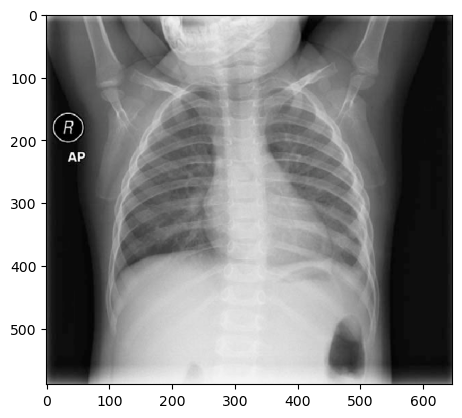

In [39]:
img = cv2.imread(r"hastaexmp5.png")
plt.imshow(img)
plt.show()

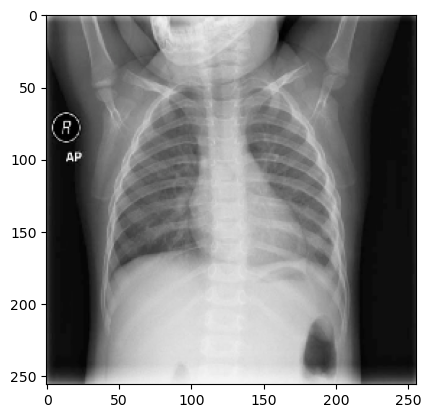

In [40]:
resize = cv2.resize(img, (256, 256))
plt.imshow(resize.astype(np.uint8))
plt.show()

In [41]:
# np.expand_dims(resize, axis=0).shape
y_pred = model.predict(np.expand_dims(resize/255, axis=0))

1/1 [==============================] - 0s 60ms/step


In [47]:
y_pred

array([[0.59416074]], dtype=float32)

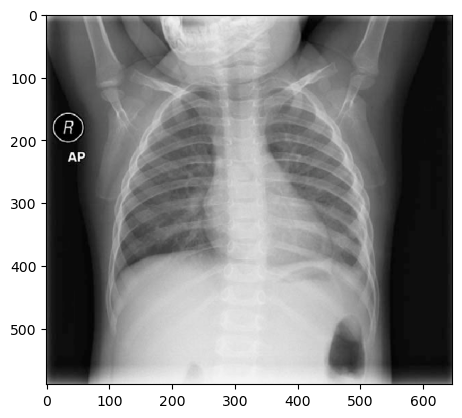

In [ ]:
img = cv2.imread(r"normalexmp3.png")
plt.imshow(img)
plt.show()

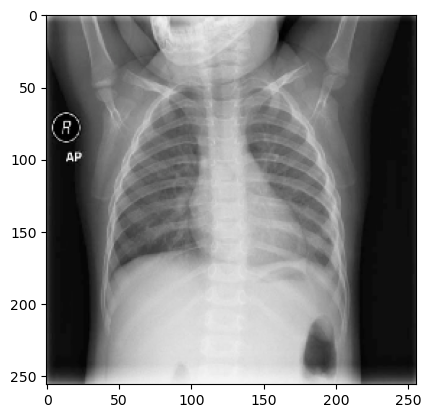

In [ ]:
resize = cv2.resize(img, (256, 256))
plt.imshow(resize.astype(np.uint8))
plt.show()

In [ ]:
# np.expand_dims(resize, axis=0).shape
y_pred = model.predict(np.expand_dims(resize/255, axis=0))

1/1 [==============================] - 0s 60ms/step


In [ ]:
y_pred

array([[0.59416074]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join("models", "FC(second)model.h5"))